<a href="https://colab.research.google.com/github/AydenRU/neural_networks-/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%964.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №4. Построение сверточной нейронной сети для классификации изображений, с использованием BatchNormalization() и Dropout()

[Код с пары](https://colab.research.google.com/drive/1cvPrPI09ySQy-D92gKTzmanVi2cj5Gw_?usp=sharing)

## Задание 1. Построение сверточной нейронной сети для классификации изображений из датасета CIFAR-100, с использованием BatchNormalization() и Dropout():

### 1.1. Загрузите исходный датасет. Разделите его на обучающую и тестовую выборки:

*P.S.: Не забудьте обратить внимание на размерность (shape) исходных данных и при необходимости измените её (см. примеры из предыдущих занятий)*

[Информация о датасете в Kaggle](https://www.kaggle.com/datasets/fedesoriano/cifar100?resource=download&select=meta)

[Техническая документация по использованию датасета в Keras](https://keras.io/api/datasets/cifar100/)





In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [13]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, AveragePooling2D
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import keras
from keras import backend as K

In [23]:
cifar100 = tf.keras.datasets.cifar100

(x_train, y_train), (x_val, y_val) = cifar100.load_data()
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)


169001437/169001437 [==============================] - 13s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


### 1.2. Визуализируйте несколько изображений из датасета:


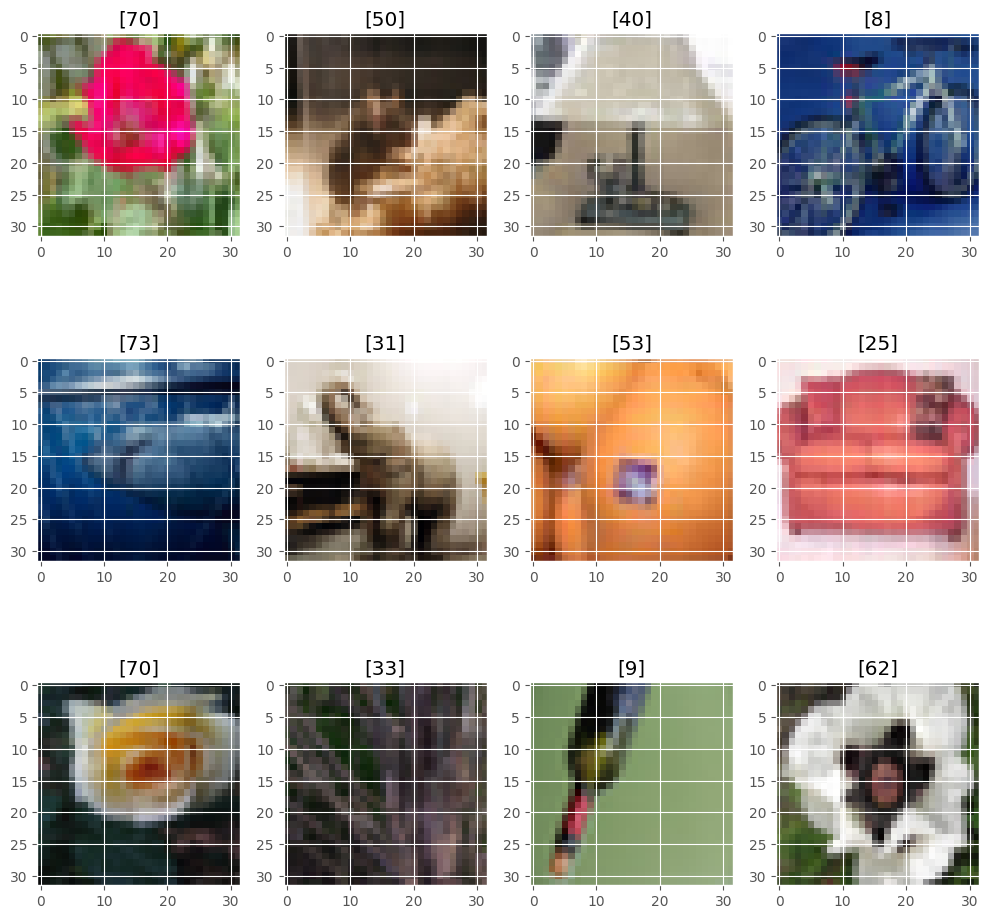

In [24]:
def show_samples(data, labels):
    plt.subplots(figsize=(10, 10))
    for i in range(12):
        plt.subplot(3, 4, i+1)
        k = np.random.randint(0, data.shape[0])
        plt.title(labels[k])
        plt.imshow(data[k])
    plt.tight_layout()
    plt.show()


show_samples(x_train, y_train)

### 1.3. Произведите нормализацию данных:

In [25]:
y_train = tf.one_hot(y_train,
                     depth=y_train.max() + 1,
                     dtype=tf.float64)
y_val = tf.one_hot(y_val,
                   depth=y_val.max() + 1,
                   dtype=tf.float64)
y_train = tf.squeeze(y_train)
y_val = tf.squeeze(y_val)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [26]:
# x_train.reshape(len(x_train), 3072)
# x_val.reshape(len(x_val), 3072)

x_train = np.array(x_train, dtype="float") / 255.0
x_val = np.array(x_val, dtype="float") / 255.0

print(x_train.shape)
print(x_val.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


### 1.4. Создайте модель сверточной нейронной сети для решения поставленной задачи без использования BatchNormalization() и Dropout():

Имя данной модели: model_1

Обучите созданную модель

In [27]:
model1 = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(100,  activation='softmax')
])

model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 dense_5 (Dense)             (None, 128)              

In [28]:
model1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model1.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_val,y_val))

model1.evaluate(x_val, y_val)

Epoch 1/5
1563/1563 [==============================] - 11s 5ms/step - loss: 3.6483 - accuracy: 0.1506 - val_loss: 3.1284 - val_accuracy: 0.2412
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 2.8413 - accuracy: 0.2938 - val_loss: 2.7174 - val_accuracy: 0.3288
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 2.4878 - accuracy: 0.3650 - val_loss: 2.5846 - val_accuracy: 0.3502
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 2.2801 - accuracy: 0.4098 - val_loss: 2.5054 - val_accuracy: 0.3702
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 2.4717 - accuracy: 0.3779


[2.4716923236846924, 0.37790000438690186]

### 1.5. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием BatchNormalization():

Имя данной модели: model_2

In [29]:
model2 = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(100,  activation='softmax')
])

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_5 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 16)        4624      
                                                                 
 batch_normalization_6 (Bat  (None, 16, 16, 16)        64        
 chNormalization)                                                
                                                      

Обучите созданную модель

In [30]:
model2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_val,y_val))

model2.evaluate(x_val, y_val)

Epoch 1/5
1563/1563 [==============================] - 14s 7ms/step - loss: 3.5064 - accuracy: 0.1790 - val_loss: 3.3133 - val_accuracy: 0.2114
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 2.7843 - accuracy: 0.3121 - val_loss: 3.3591 - val_accuracy: 0.2328
Epoch 3/5
1563/1563 [==============================] - 10s 6ms/step - loss: 2.5071 - accuracy: 0.3668 - val_loss: 2.8678 - val_accuracy: 0.2924
Epoch 4/5
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3436 - accuracy: 0.3990 - val_loss: 2.5338 - val_accuracy: 0.3588
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 2.6615 - accuracy: 0.3444


[2.6615307331085205, 0.34439998865127563]

### 1.6. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout():

Имя данной модели: model_3

In [31]:
model3 = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(100,  activation='softmax')
])

model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 16)        4624      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 8, 8, 16)          0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 8, 8, 16)         

Обучите созданную модель

In [32]:
model3.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history3 = model3.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_val,y_val))

model3.evaluate(x_val, y_val)

Epoch 1/15
1563/1563 [==============================] - 9s 5ms/step - loss: 3.9224 - accuracy: 0.1029 - val_loss: 3.4930 - val_accuracy: 0.1761
Epoch 2/15
1563/1563 [==============================] - 9s 5ms/step - loss: 3.3648 - accuracy: 0.1925 - val_loss: 3.1778 - val_accuracy: 0.2322
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 3.1362 - accuracy: 0.2357 - val_loss: 3.0326 - val_accuracy: 0.2606
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 3.0057 - accuracy: 0.2632 - val_loss: 2.9099 - val_accuracy: 0.2884
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 2.9055 - accuracy: 0.2787 - val_loss: 2.8624 - val_accuracy: 0.2941
Epoch 6/15
1563/1563 [==============================] - 7s 4ms/step - loss: 2.8311 - accuracy: 0.2927 - val_loss: 2.7938 - val_accuracy: 0.3088
Epoch 7/15
1563/1563 [==============================] - 9s 6ms/step - loss: 2.7601 - accuracy: 0.3077 - val_loss: 2.7333 - val_accuracy:

[2.5456299781799316, 0.3571000099182129]

### 1.7. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout() и BatchNormalization().

См. рекомендации [здесь](https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout) и [здесь](https://www.kaggle.com/code/ryanholbrook/dropout-and-batch-normalization/)

Имя данной модели: model_4

In [33]:
model4 = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),
    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(100,  activation='softmax')
])

model4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_8 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 16)        4624      
                                                                 
 batch_normalization_9 (Bat  (None, 16, 16, 16)       

Обучите созданную модель

In [34]:
model4.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history4 = model4.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_val,y_val))

model4.evaluate(x_val, y_val)

Epoch 1/15
1563/1563 [==============================] - 13s 7ms/step - loss: 3.7238 - accuracy: 0.1434 - val_loss: 3.3509 - val_accuracy: 0.2024
Epoch 2/15
1563/1563 [==============================] - 9s 6ms/step - loss: 3.0837 - accuracy: 0.2512 - val_loss: 3.0424 - val_accuracy: 0.2565
Epoch 3/15
1563/1563 [==============================] - 11s 7ms/step - loss: 2.8187 - accuracy: 0.3019 - val_loss: 2.7979 - val_accuracy: 0.3041
Epoch 4/15
1563/1563 [==============================] - 10s 7ms/step - loss: 2.6687 - accuracy: 0.3318 - val_loss: 2.8554 - val_accuracy: 0.2966
Epoch 5/15
1563/1563 [==============================] - 9s 6ms/step - loss: 2.5736 - accuracy: 0.3475 - val_loss: 2.9157 - val_accuracy: 0.2776
Epoch 6/15
1563/1563 [==============================] - 10s 6ms/step - loss: 2.5071 - accuracy: 0.3612 - val_loss: 2.5592 - val_accuracy: 0.3529
Epoch 7/15
1563/1563 [==============================] - 10s 6ms/step - loss: 2.4475 - accuracy: 0.3757 - val_loss: 2.5022 - val_accu

[2.467013120651245, 0.3720000088214874]

### Задание 1.8. Пойстройте график обучения для каждой модели. Сделайте выводы по каждому из них. Подведите итог и выделите наиболее удачную модель:

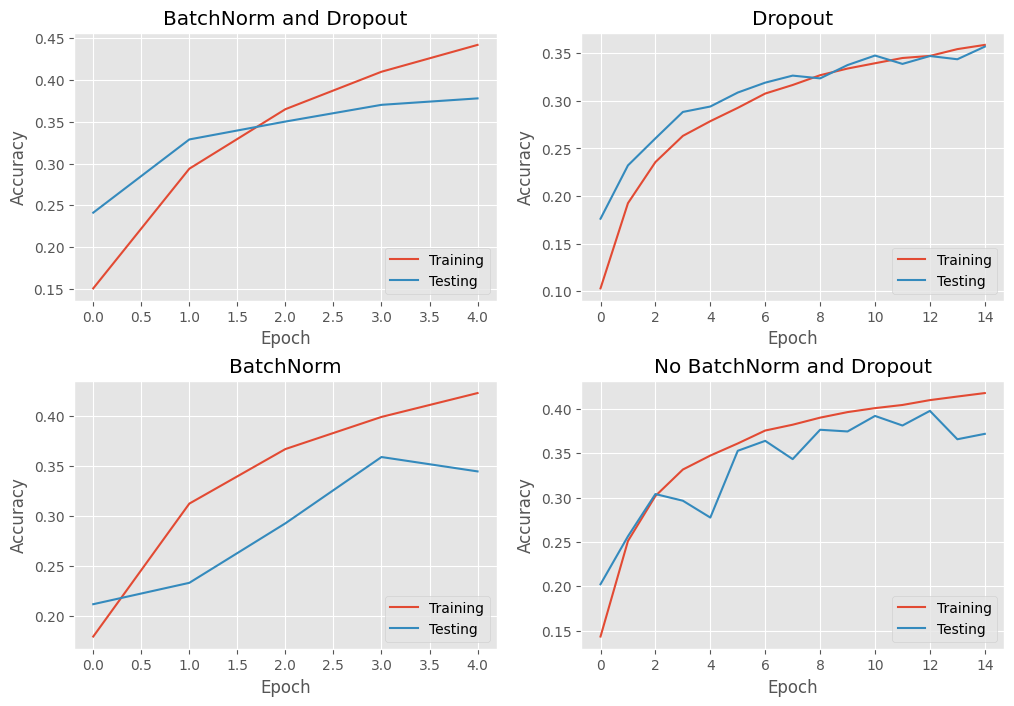

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Testing')
plt.title('BatchNorm and Dropout')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(2, 2, 2)
plt.plot(history3.history['accuracy'], label='Training')
plt.plot(history3.history['val_accuracy'], label='Testing')
plt.title('Dropout')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(2, 2, 3)
plt.plot(history2.history['accuracy'], label='Training')
plt.plot(history2.history['val_accuracy'], label='Testing')
plt.title('BatchNorm')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(2, 2, 4)
plt.plot(history4.history['accuracy'], label='Training')
plt.plot(history4.history['val_accuracy'], label='Testing')
plt.title('No BatchNorm and Dropout')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplots_adjust(hspace=0.3)

plt.show()

Ваши выводы

Ваш итог

### 1.9. Визуализируйте карты активации модели с BatchNorm() и Dropout(),отдельно по 5 классам (на Ваш выбор):

In [36]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

def visualize_act_map(model, img):
  layer_outputs = [layer.output for layer in model.layers if isinstance(layer, (tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D, tf.keras.layers.AveragePooling2D))]
  activation_model = Model(inputs=model.input, outputs=layer_outputs)

  activations = activation_model.predict(img)

  for layer_activation, layer in zip(activations, model.layers):
    if isinstance(layer, (tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D, tf.keras.layers.AveragePooling2D)):
      n_features = layer_activation.shape[-1]
      size = layer_activation.shape[1]
      n_cols = n_features // 16 + int(n_features % 16 > 0)
      display_grid = np.zeros((size * n_cols, size * 16))

      for col in range(n_cols):
        for row in range(16):
            if col * 16 + row < n_features:
              channel_image = layer_activation[0, :, :, col * 16 + row]
              channel_image -= channel_image.mean()

              if channel_image.std() == 0:
                channel_image += 1*(10**8)

              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128

              channel_image = np.clip(channel_image, 0, 255).astype('uint8')

              display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

      scale = 1. / size
      fig, ax = plt.subplots(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
      ax.set_title(layer.name)
      ax.grid(False)
      ax.imshow(display_grid, aspect='auto', cmap='viridis')

      for i in range(1, n_cols):
        ax.axhline(y=i * size - 0.5, color='white', linewidth=2)
      for i in range(1, 16):
        ax.axvline(x=i * size - 0.5, color='white', linewidth=2)

      plt.show()

313/313 [==============================] - 1s 2ms/step


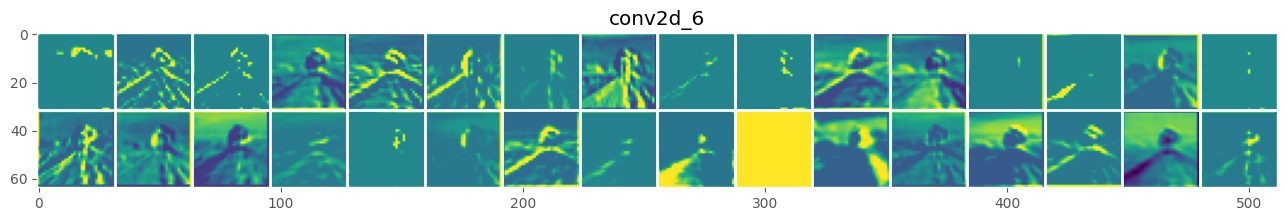

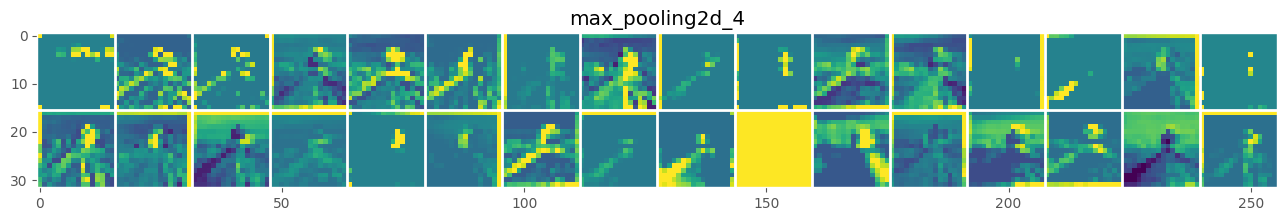

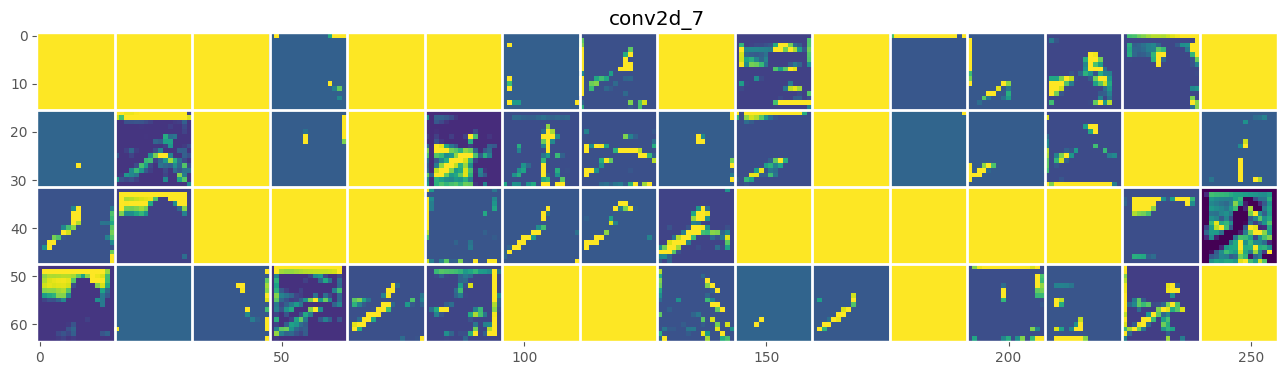

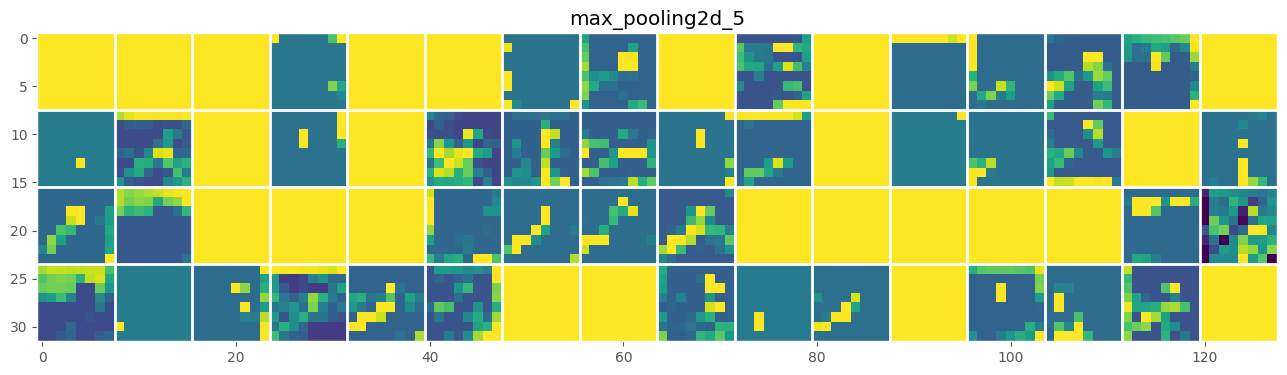

313/313 [==============================] - 1s 2ms/step


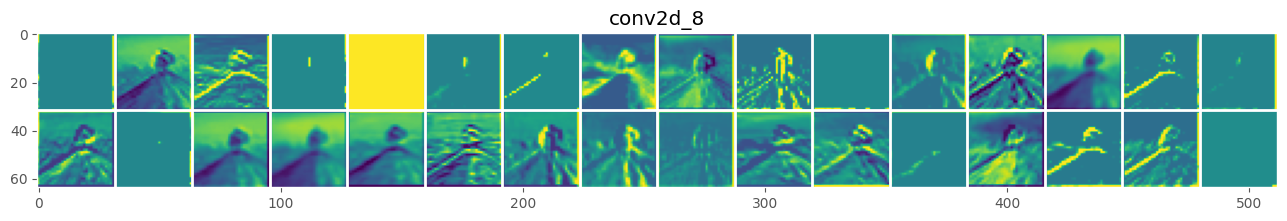

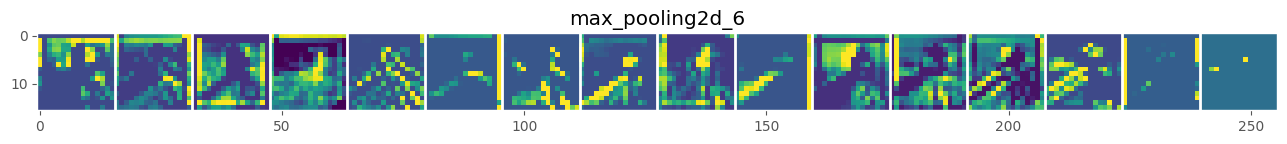

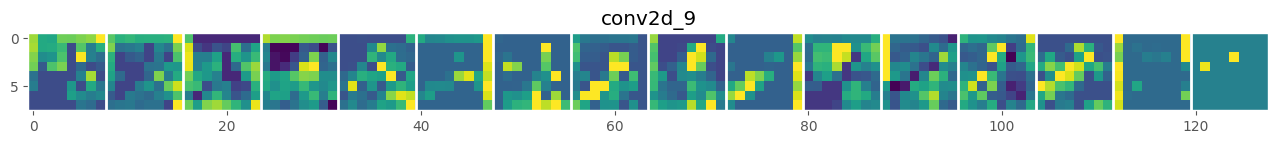

313/313 [==============================] - 1s 2ms/step


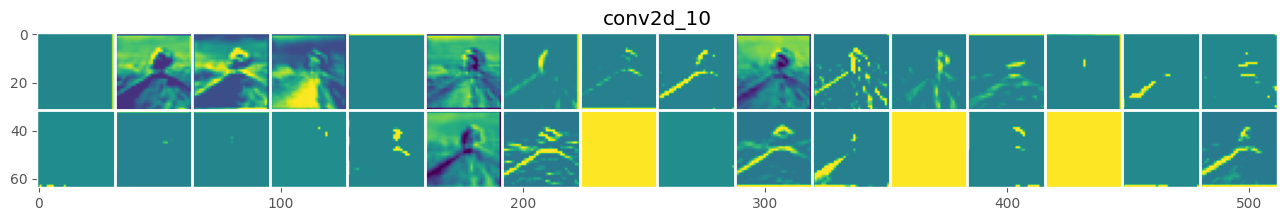

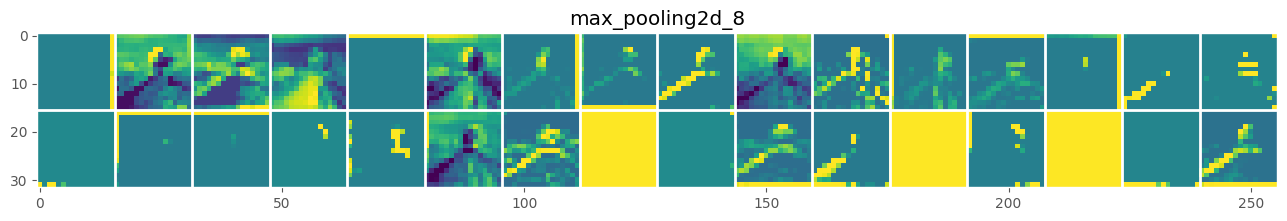

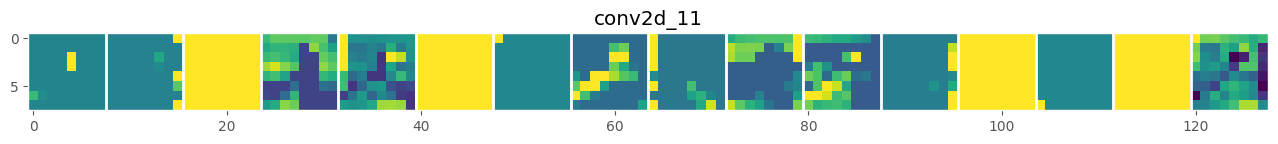

313/313 [==============================] - 1s 2ms/step


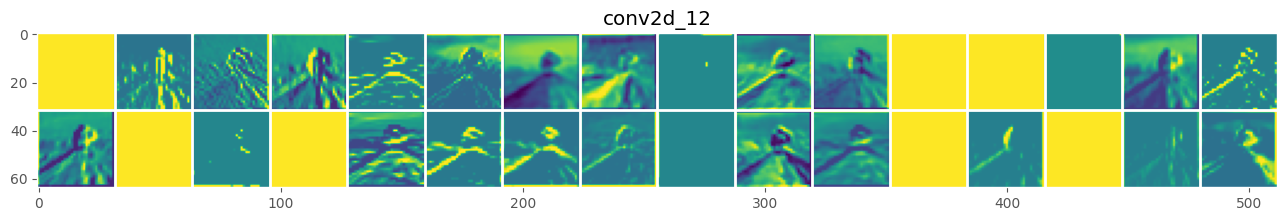

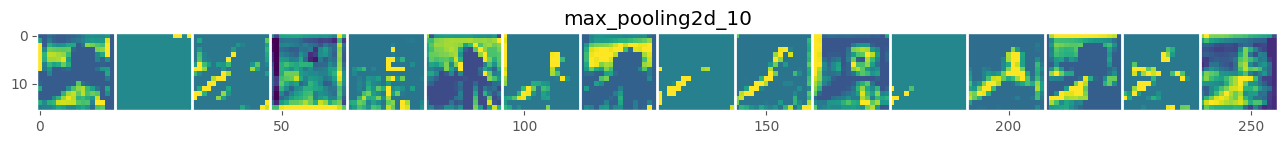

In [37]:
visualize_act_map(model1, x_val)
visualize_act_map(model2, x_val)
visualize_act_map(model3, x_val)
visualize_act_map(model4, x_val)

## Задание 2. Загрузите Ваш датасет из предыдущей работы. Разделите его на обучающую и тестовую выборки. Обучите модель классификации с применением BatchNorm() и Dropout(). Сравните точность с моделями, обученными Вами ранее. Визуализируйте карты активаций.

In [1]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def load_images(imagePaths, compression_size = 32):
  """
  Функция для загрузки изображений и преобразования их в векторы признаков.

  Args:
    imagePaths: список путей к изображениям.
    compression_size: размер сжатия изображения

  Returns:
    data: список векторов признаков (сжатых изображений, преобразованных в векторы).
    labels: список меток классов.
  """

  data = []
  labels = []

  for imagePath in imagePaths:
    # Загрузка изображения
    image = cv2.imread(imagePath)

    # Изменение разрешения изображения (по умолчанию 32х32х3 -> 3072,)
    image = cv2.resize(image, (compression_size, compression_size))

    # Добавление изображения в список
    data.append(image)

    # Извлечение метки класса из пути к изображению
    label = imagePath.split(os.path.sep)[-2]

    # Добавление метки в список
    labels.append(label)

  return data, labels

In [5]:
# Собираем список путей к каждому изображению и перемешиваем их
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/Задание_2/dataset/train")))
random.shuffle(imagePaths)

In [6]:
from google.colab.patches import cv2_imshow

compression_size = 32

data, labels = load_images(imagePaths, compression_size)

In [7]:
data = np.array(data, dtype='float')
labels = np.array(labels)

# data=data.reshape(len(data), compression_size, compression_size, 3)

print(data.shape)
print(labels.shape)

(3642, 32, 32, 3)
(3642,)


In [8]:
(X_train, X_val, Y_train, Y_val) = train_test_split(
    data,
    labels,
    test_size=0.25,
    random_state=42)

X_train=X_train.astype('float32')/255
X_val=X_val.astype('float32')/255

print(X_train.shape)
print(X_train.shape)

(2731, 32, 32, 3)
(2731, 32, 32, 3)


In [9]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_val = lb.transform(Y_val)

print(Y_train.shape)
print(Y_val.shape)

print(Y_train[:3])
print(Y_val[:3])

(2731, 3)
(911, 3)
[[1 0 0]
 [1 0 0]
 [0 1 0]]
[[0 0 1]
 [0 0 1]
 [0 0 1]]


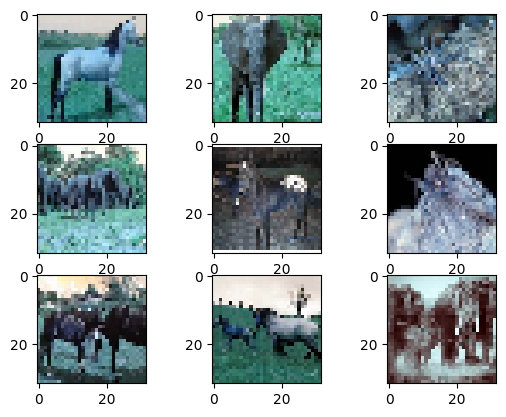

In [10]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

plt.show()

In [18]:
model = Sequential()
model.add(Conv2D(128, (3,3), padding='same', activation='relu',input_shape=(compression_size, compression_size, 3)))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2,2), strides=2))   #Removing MaxPooling layer: Add accuracy but reduces training speed
Dropout(0.25)

model.add(Conv2D(64,kernel_size=(3,3), padding='same',activation='relu'))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
Dropout(0.25)

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 128)       0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 256)              

In [19]:
model4 = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),
    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(100,  activation='softmax')
])

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_2 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 16)        4624      
                                                                 
 batch_normalization_3 (Bat  (None, 16, 16, 16)       

In [20]:
INIT_LR = 0.00005
epochs = 6
opt = Adam(learning_rate=INIT_LR)

model.compile(optimizer=opt,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=epochs,
    validation_data=(X_val, Y_val))

model.evaluate(X_val, Y_val)

Epoch 1/6
86/86 [==============================] - 8s 12ms/step - loss: 1.0858 - accuracy: 0.3885 - val_loss: 1.0560 - val_accuracy: 0.4501
Epoch 2/6
86/86 [==============================] - 1s 7ms/step - loss: 1.0315 - accuracy: 0.5035 - val_loss: 0.9694 - val_accuracy: 0.5774
Epoch 3/6
86/86 [==============================] - 1s 7ms/step - loss: 0.9379 - accuracy: 0.5760 - val_loss: 0.8793 - val_accuracy: 0.5862
Epoch 4/6
86/86 [==============================] - 1s 7ms/step - loss: 0.8527 - accuracy: 0.6071 - val_loss: 0.7740 - val_accuracy: 0.6839
Epoch 5/6
86/86 [==============================] - 1s 7ms/step - loss: 0.7857 - accuracy: 0.6532 - val_loss: 0.7273 - val_accuracy: 0.6937
Epoch 6/6
29/29 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.7212


[0.6885584592819214, 0.7211855053901672]

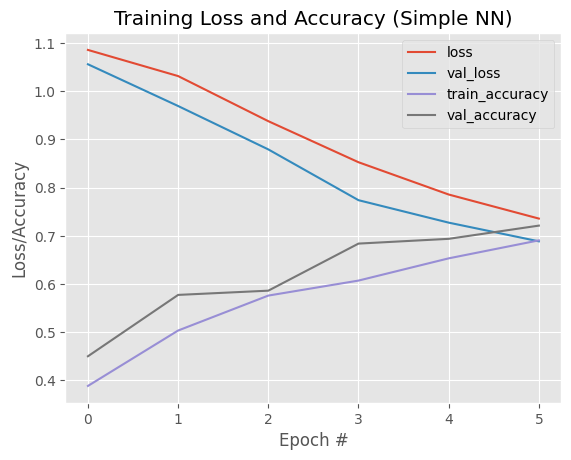

In [21]:
N = np.arange(0, epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [22]:
Y_train

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]])